In [20]:
import netCDF4 as nc
import numpy as np
import matplotlib.pyplot as plt
import os, sys

file1 = "../data/def_100_1.nc"
file2 = "../data/def_100_10.nc"

d1 = nc.Dataset(file1, mode="r")
d2 = nc.Dataset(file2, mode="r")

n_snapshots = d1.dimensions["n_snapshots"].size

In [21]:
# Evaluate the norm of the difference between the two solutions
# at each time step
# Extract dimensions
def get_data(time, dataset):    
    n_members = dataset.dimensions["n_members"].size
    n_snapshots = dataset.dimensions["n_snapshots"].size
    x_size_and_boundary = dataset.dimensions["x_size_and_boundary"].size
    n_coupled_and_y_size_and_boundary = dataset.dimensions[
        "n_coupled_and_x_size_and_boundary"
    ].size
    n_coupled = dataset.getncattr("n_coupled")
    x_size = dataset.getncattr("x_length")
    y_size = dataset.getncattr("y_length")

    # Extract the data variable
    data = dataset.variables["data"][:]

    coupled_idx = 0
    return data[0, time, :, coupled_idx::n_coupled]

In [22]:
t_arr = np.arange(0, n_snapshots)
l1 = np.zeros(n_snapshots)
for t in range(n_snapshots):
    data1 = get_data(t, d1)
    data2 = get_data(t, d2)
    diff = np.linalg.norm(data1 - data2) / np.prod(data1.shape)
    l1[t] = diff

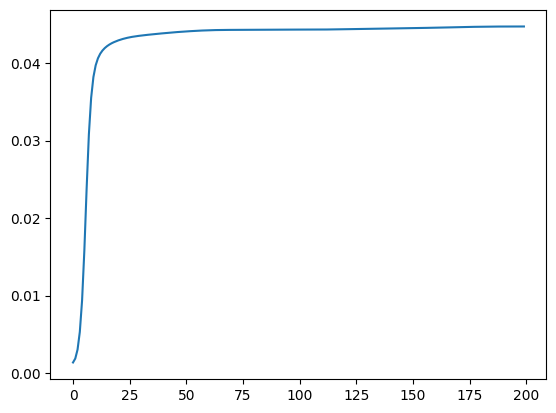

In [23]:
plt.plot(t_arr, l1)